<a href="https://colab.research.google.com/github/MariemBC/TP2_RN/blob/main/TP2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
from google.colab import files
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import time
import io 

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [25]:
upload=files.upload()

Saving Iris.csv to Iris (2).csv


1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.


In [26]:
data=pd.read_csv("Iris.csv")

2- Afficher les 10 premières lignes du DataFrame

In [27]:

data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


3- Afficher les dimensions du dataframe.

In [28]:
print(data.shape)

(150, 6)


4- Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.

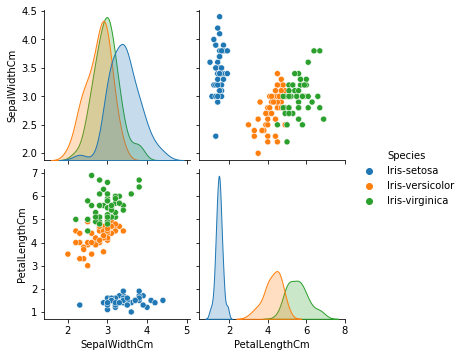

In [29]:
print(sns.pairplot(data=data, vars=('SepalWidthCm','PetalLengthCm') , hue='Species'))
plt.show()

5- Ecrire un script python permettant de labelliser les différentes espèces d’iris.( Iris_Setosa → 0 , Iris_Versicolor→ 1 et Iris_Virginica → 2 )

In [30]:
dataFrame = data.replace({'Species' : {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2 }},regex=True)


6- Afficher du nouveau les 10 premières lignes du nouveau DataFrame
contenant les labels.

In [31]:
dataFrame.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [32]:
#7-Écrire un script python permettant la division de dataset en des données
#d’apprentissage (70%) et des données de test (30%).

train, test =model_selection.train_test_split(dataFrame, test_size= 0.3)
trainX=train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
trainY=train.Species
testX=test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
testY=test.Species

8- Afficher les 10 premières données d’apprentissage et celles de test.

In [33]:
print(trainX.head(10))


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
146            6.3           2.5            5.0           1.9
34             4.9           3.1            1.5           0.1
25             5.0           3.0            1.6           0.2
131            7.9           3.8            6.4           2.0
92             5.8           2.6            4.0           1.2
109            7.2           3.6            6.1           2.5
12             4.8           3.0            1.4           0.1
139            6.9           3.1            5.4           2.1
121            5.6           2.8            4.9           2.0
0              5.1           3.5            1.4           0.2


In [34]:

print(trainY.head(10))


146    1
34     0
25     0
131    1
92     2
109    1
12     0
139    1
121    1
0      0
Name: Species, dtype: int64


In [35]:

print (testX.head(10))



     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
64             5.6           2.9            3.6           1.3
17             5.1           3.5            1.4           0.3
22             4.6           3.6            1.0           0.2
57             4.9           2.4            3.3           1.0
125            7.2           3.2            6.0           1.8
5              5.4           3.9            1.7           0.4
83             6.0           2.7            5.1           1.6
122            7.7           2.8            6.7           2.0
3              4.6           3.1            1.5           0.2
118            7.7           2.6            6.9           2.3


In [36]:
print(testY.head(10))

64     2
17     0
22     0
57     2
125    1
5      0
83     2
122    1
3      0
118    1
Name: Species, dtype: int64


9- Ecrire un script python qui utilise un perceptron multicouche pour
l’apprentissage des données avec un optimisateur (‘lbfgs’, epsilon=0.07 et nombre maximum d’itération=150) .

In [37]:
%%time
clf=MLPClassifier(solver='lbfgs',alpha=1e-05, hidden_layer_sizes=(3,3),epsilon=0.07,max_iter=150)
print(clf.fit(trainX,trainY))

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')
CPU times: user 68.7 ms, sys: 2.92 ms, total: 71.6 ms
Wall time: 75.7 ms


10- Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.

In [40]:
time
train_score = clf.score(trainX, trainY)
print("Score train : {}".format(train_score))
test_score = clf.score(testX, testY)
print("score test : {}".format(test_score))

pred=clf.predict(testX)
print('The accuracy is :',metrics.accuracy_score(pred,testY))
print("predict values :" , pred)

Score train : 0.9904761904761905
score test : 0.8888888888888888
The accuracy is : 0.8888888888888888
predict values : [0 0 0 0 1 0 1 1 0 1 1 2 0 0 0 2 0 0 2 0 0 2 1 2 0 2 2 2 1 2 2 1 1 1 1 2 1
 0 0 1 1 0 1 0 0]


 11- Afficher la matrice de confusion


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


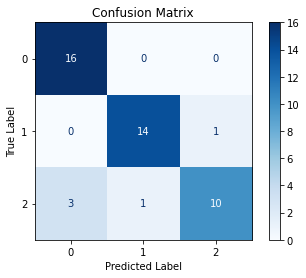

In [42]:
color = 'black'
matrix = plot_confusion_matrix(clf, testX, testY, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

12- La matrice de confusion montre que la bonne performance de l'algorithme utilisé : Perceptron, et que les échantillons sont bien classés.

13- On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7

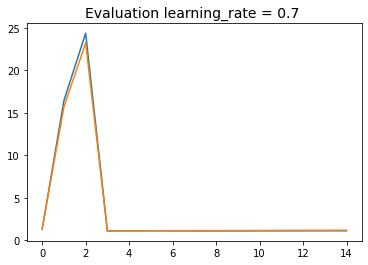

In [44]:

clf = MLPClassifier(solver='sgd' , max_iter=150, random_state=0,learning_rate_init=0.7,verbose=0 )
clf.fit(trainX, trainY)

plt.title("Evaluation learning_rate = 0.7 ",fontsize=14)
plt.plot(clf.loss_curve_)
clf.fit(testX, testY)
plt.plot(clf.loss_curve_)

14-Nous allons étudier la variation du paramètre de taux d’apprentissage,
donc nous allons afficher la courbe d'évolution d’apprentissage et celle de test
en fonction de variation du taux d’apprentissage.

In [45]:
params= [
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter":150,
    },
      {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter":300,
    },
  {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.2,
        "max_iter":300,
    },
      {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init":0.7,
        "max_iter":150,
    },
    {
       "solver" :"adam",
       "learning_rate_init":0.01,
      "max_iter":300,

    },
]
labels= [
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",

]
plot_args = [
    {"c":"red","linestyle":"-"},
    {"c":"green","linestyle":"-"},
    {"c":"blue","linestyle":"-"},
    {"c":"red","linestyle":"--"},
    {"c":"green","linestyle":"--"},
]


In [47]:
mlps=[]

for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(trainX,trainY)
  mlps.append(mlp)
  print("Training  score : %f" % mlp.score(trainX,trainY))

training:constant learning-rate_0.2
Training  score : 0.323810
training:constant learning-rate_0.7
Training  score : 0.342857
training:invscaling learning-rate_0.2
Training  score : 0.961905
training:invscaling learning-rate_0.7
Training  score : 0.657143
training:adam
Training  score : 1.000000


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [48]:

mlps2=[]
for label,param in zip(labels,params):
  print("training:%s" % label)
  mlp=MLPClassifier(random_state=0,**param)
  mlp.fit(testX,testY)
  mlps2.append(mlp)
  print("Training set score : %f" % mlp.score(testX,testY))


training:constant learning-rate_0.2
Training set score : 0.355556
training:constant learning-rate_0.7
Training set score : 0.355556
training:invscaling learning-rate_0.2
Training set score : 0.977778
training:invscaling learning-rate_0.7
Training set score : 0.688889
training:adam
Training set score : 0.955556


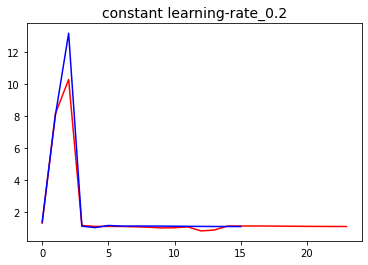

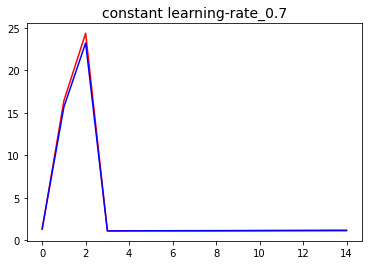

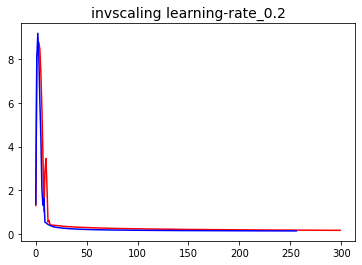

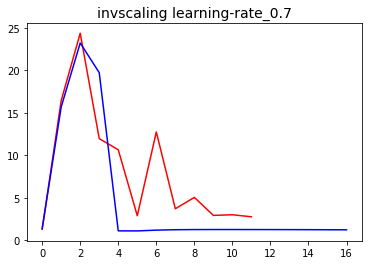

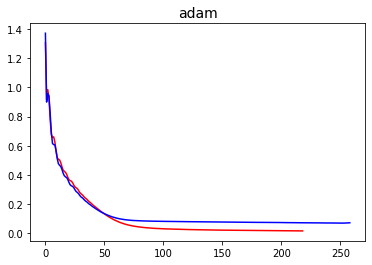

In [49]:

for mlp1, mlp2, label, args in zip(mlps, mlps2,labels,plot_args):
  plt.plot(mlp1.loss_curve_ , 'r', label=label)
  plt.plot(mlp2.loss_curve_ , 'b', label=label)
  plt.title(label,fontsize=14)

  plt.show()

15- Si on augmente le nombre d’itérationsi 10 fois le réseau va s'entraîner trop longtemps, il pourrait causer le 'overfitting'. la solution consiste à séparer les données d'entraînement  en plusieurs groupes et les tester sur chacun non seuleument en 2 groupes comme on a travaillé : les données d'apprentissage et les données test. Donc si on a créé K groupes, on entraînera alors le modèle K fois sur chaque groupe en variant la répartition d'apprentissages et de tests.
Or on peut ajouter des données d'entraînement pour que la machine puisse mieux généraliser. Il faut une bonne variété de données.

# **Recurrent Neural Network (RNN)**

In [50]:
!pip install  tensorflow keras  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import keras 
from sklearn.preprocessing import normalize 
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
#from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.utils import np_utils

In [59]:
dataR=dataFrame.iloc[np.random.permutation(len(data))]
print(dataR.head())

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
11    12            4.8           3.4            1.6           0.2        0
132  133            6.4           2.8            5.6           2.2        1
149  150            5.9           3.0            5.1           1.8        1
140  141            6.7           3.1            5.6           2.4        1
102  103            7.1           3.0            5.9           2.1        1


In [60]:
X=dataR.iloc[:,1:5].values
y=dataR.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[4.8 3.4 1.6 0.2]
 [6.4 2.8 5.6 2.2]
 [5.9 3.  5.1 1.8]]
Examples of y
 [0 1 1]


In [61]:
#Normalization
X_normalized=normalize(X,axis=0)
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [62]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10)


Epoch 1/10
6/6 [==============================] - 1s 60ms/step - loss: 1.0809 - accuracy: 0.4667 - val_loss: 1.0743 - val_accuracy: 0.5333
Epoch 2/10
6/6 [==============================] - 0s 17ms/step - loss: 1.0112 - accuracy: 0.5917 - val_loss: 1.0023 - val_accuracy: 0.5333
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.8679 - accuracy: 0.7000 - val_loss: 0.8584 - val_accuracy: 0.5333
Epoch 4/10
6/6 [==============================] - 0s 21ms/step - loss: 0.6629 - accuracy: 0.7000 - val_loss: 0.6515 - val_accuracy: 0.5333
Epoch 5/10
6/6 [==============================] - 0s 17ms/step - loss: 0.4644 - accuracy: 0.7333 - val_loss: 0.4595 - val_accuracy: 0.7667
Epoch 6/10
6/6 [==============================] - 0s 33ms/step - loss: 0.3154 - accuracy: 0.9000 - val_loss: 0.3151 - val_accuracy: 0.9667
Epoch 7/10
6/6 [==============================] - 0s 17ms/step - loss: 0.2536 - accuracy: 0.9250 - val_loss: 0.2170 - val_accuracy: 0.9667
Epoch 8/10
6/6 [===========

In [63]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)
accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy =",accuracy )

1/1 [==============================] - 0s 101ms/step
Accuracy = 100.0
